# Assignment 6b

In [31]:
import numpy as np
class LogisticRegression:
    sigmoid=lambda z:  1 / (1 + np.exp(-z))
    def __init__(self) -> None:#just initialzing an empty object.
        self.weights=[]
    def fit(self,X,y,epochs,lr):
        import matplotlib.pyplot as plt
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        #making inital guess
        self.weights=np.random.rand(x.shape[1])
        l=len(x)
        loss_history=[]
        #gradient descent 
        for epoch in range(epochs):
            prds=LogisticRegression.sigmoid((x@self.weights))
            grads=1/l*x.T.dot(prds-y)
            self.weights-=lr*grads
            loss=-1/l*(y.dot(np.log(prds))+(1-y).dot(np.log(1-prds)))
            loss_history+=[loss]
        plt.figure(figsize=(10, 6))
        plt.plot(range(epochs), loss_history, color='green')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss over Iterations')
        plt.show()
    def predict(self,X):
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        ypred=(prob>=0.5).astype(int)
        return ypred
    def predict_classes(self,X):
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        classes=[(prob>=0.5).astype(int)] #if its >=0.5 then it'll be assigned class 1.
        return classes
    def evaluate(self,X,y):
        from sklearn.preprocessing import StandardScaler
        from sklearn.metrics import confusion_matrix
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        ypred=(prob>=0.5).astype(int)
        #mat=confusion_matrix(y, ypred)
        accuracy = np.mean(ypred == y)
        return accuracy

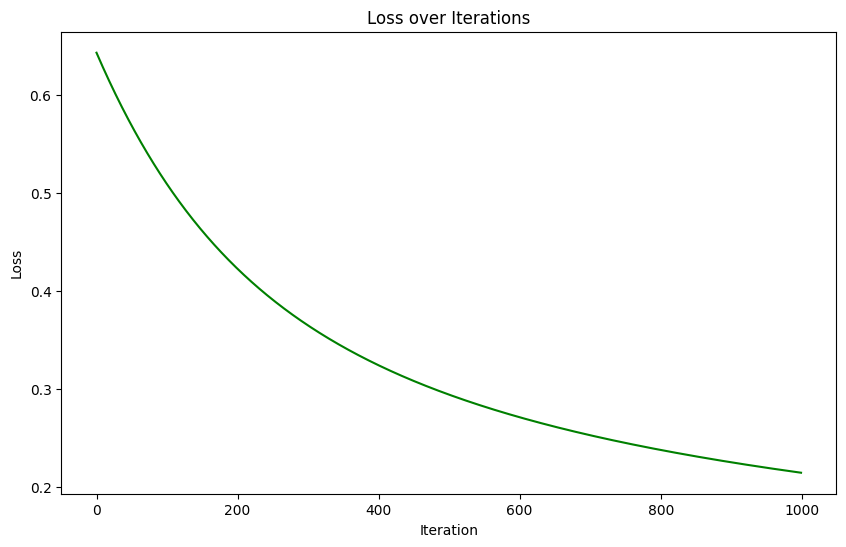

In [34]:
X_log = np.array([[0.5], [1.5], [2.5], [3.5], [4.5]])
y_log = np.array([0, 0, 1, 1, 1])
logistic_model = LogisticRegression()
logistic_model.fit(X_log, y_log, epochs=1000, lr=0.01)

In [35]:
log_predictions = logistic_model.predict(X_log)
log_classes = logistic_model.predict_classes(X_log)
accuracy = logistic_model.evaluate(X_log, y_log)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0
